In [1]:
import pandas as pd
import numpy as np
import os
import wfdb
import ast

import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Num GPUs Available:  0
Device mapping: no known devices.


In [2]:
data_path = '/kaggle/input/ptbxl-bui/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3'

ptbxl_df= pd.read_csv(os.path.join(data_path,'ptbxl_database.csv'))
scp_statements_df = pd.read_csv(os.path.join(data_path,'scp_statements.csv'))

In [3]:
ptbxl_df.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [4]:
scp_statements_df.head()

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [5]:
ptbxl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

In [6]:
scp_statements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     71 non-null     object 
 1   description                    71 non-null     object 
 2   diagnostic                     44 non-null     float64
 3   form                           19 non-null     float64
 4   rhythm                         12 non-null     float64
 5   diagnostic_class               44 non-null     object 
 6   diagnostic_subclass            44 non-null     object 
 7   Statement Category             71 non-null     object 
 8   SCP-ECG Statement Description  71 non-null     object 
 9   AHA code                       37 non-null     float64
 10  aECG REFID                     23 non-null     object 
 11  CDISC Code                     13 non-null     object 
 12  DICOM Code                     13 non-null     objec

In [7]:
print(ptbxl_df.isna().sum())
print(scp_statements_df.isna().sum())

ecg_id                              0
patient_id                          0
age                                 0
sex                                 0
height                          14825
weight                          12378
nurse                            1473
site                               17
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8468
infarction_stadium1             16187
infarction_stadium2             21696
validated_by                     9378
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20201
static_noise                    18539
burst_noise                     21186
electrodes_problems             21769
extra_beats                     19850
pacemaker                       21508
strat_fold                          0
filename_lr 

# Data Cleaning

In [8]:
print(scp_statements_df.isna().sum())

Unnamed: 0                        0
description                       0
diagnostic                       27
form                             52
rhythm                           59
diagnostic_class                 27
diagnostic_subclass              27
Statement Category                0
SCP-ECG Statement Description     0
AHA code                         34
aECG REFID                       48
CDISC Code                       58
DICOM Code                       58
dtype: int64


In [9]:
ptbxl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

In [10]:
def max_probability(spc_codes):
    codes = ast.literal_eval(spc_codes)
    
    # Get the maximum value in the dictionary
    max_value = max(codes.values())
    return max_value

In [11]:
def spc_to_diag(spc_codes, subclass=False, max_prob=False):
    ''' 
    Function that returns the diagnostic label of the highest SPC codes as given in the PTB_XL database.
    
    SPC codes are labelled in a dictionary with probabilities of being that label
     ex. {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
    spc_statements.csv provides alookup to convert spc codes to diagnostic label
    
    INPUTS: 
        spc_codes: string of spc_code dictionary as in the spc_codes column of the ptbxl_databse
        subclass: returns superclass if TRUE, subclass if FALSE 
    ''' 
    
    # Convert string to dictionary
    codes = ast.literal_eval(spc_codes)
    
    # Get the maximum value in the dictionary
    max_value = max(codes.values())

    # Find all keys with the maximum value
    keys_with_max_value = [key for key, value in codes.items() if value == max_value]

    # If there is only one key with the maximum value, return it
    if len(keys_with_max_value) == 1:
        max_code = keys_with_max_value[0]
    else:
        return None

    # Convert the maximum spc code to the diganostic class
    if not subclass:
        diagnosis = scp_statements_df[scp_statements_df.iloc[:,0] == max_code]['diagnostic_class'].item()
    else:
        diagnosis = scp_statements_df[scp_statements_df.iloc[:,0] == max_code]['diagnostic_subclass'].item()

    return diagnosis

In [12]:
#As this experiment is Multi-Class Classification, the records that have multiple labels are removed in the above method

superclasses = ptbxl_df['scp_codes'].apply(spc_to_diag)
subclasses = ptbxl_df['scp_codes'].apply(spc_to_diag, subclass=True)
probscore = ptbxl_df['scp_codes'].apply(max_probability)

In [13]:
columns = ['strat_fold', 'filename_lr', 'filename_hr']
ecg_dataset = ptbxl_df[columns]
ecg_dataset.insert(0, 'class', superclasses)
ecg_dataset.insert(1, 'subclass', subclasses)
ecg_dataset.insert(2, 'prob', probscore)

ecg_dataset = ecg_dataset.dropna(axis=0)

ecg_dataset.head()

,class,subclass,prob,strat_fold,filename_lr,filename_hr
0,NORM,NORM,100.0,3,records100/00000/00001_lr,records500/00000/00001_hr
1,NORM,NORM,80.0,2,records100/00000/00002_lr,records500/00000/00002_hr
2,NORM,NORM,100.0,5,records100/00000/00003_lr,records500/00000/00003_hr
3,NORM,NORM,100.0,3,records100/00000/00004_lr,records500/00000/00004_hr
4,NORM,NORM,100.0,4,records100/00000/00005_lr,records500/00000/00005_hr


In [14]:
ecg_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16388 entries, 0 to 21798
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        16388 non-null  object 
 1   subclass     16388 non-null  object 
 2   prob         16388 non-null  float64
 3   strat_fold   16388 non-null  int64  
 4   filename_lr  16388 non-null  object 
 5   filename_hr  16388 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 896.2+ KB


In [15]:
print(f"{superclasses.isna().sum()} of Records removed due to Multi Label from {len(ptbxl_df)}")
print (f"{len(ecg_dataset)} exists upon Data Cleaning")

5411 of Records removed due to Multi Label from 21799
16388 exists upon Data Cleaning


# **Exploratory Data Analysis on ECG dataset**

In [16]:
''' get the ecg signal data from the filename and the path'''
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [17]:
#samling rate of 100 hz
sampling_rate = 100
ecg_data = load_raw_data(ecg_dataset,sampling_rate, data_path+"/")
ecg_data

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [18]:
print (f"Shape of ECG Data is {ecg_data.shape}")

Shape of ECG Data is (16388, 1000, 12)


In [19]:
# Let's Visualize the sample ECG data for different classes.
def plot_sample_ecg(df, sampling_rate, data_path, diagnostic_class):
    if sampling_rate == 100:
        ecg_class = df[df['class'] == diagnostic_class].iloc[0]['filename_lr']
    else:
        ecg_class = df[df['class'] == diagnostic_class].iloc[0]['filename_hr']
    record100 = wfdb.rdrecord(os.path.join(data_path,ecg_class))
    wfdb.plot_wfdb(record=record100, title=f'Sample signal of 100 hz {diagnostic_class} Record', figsize=(15,12))

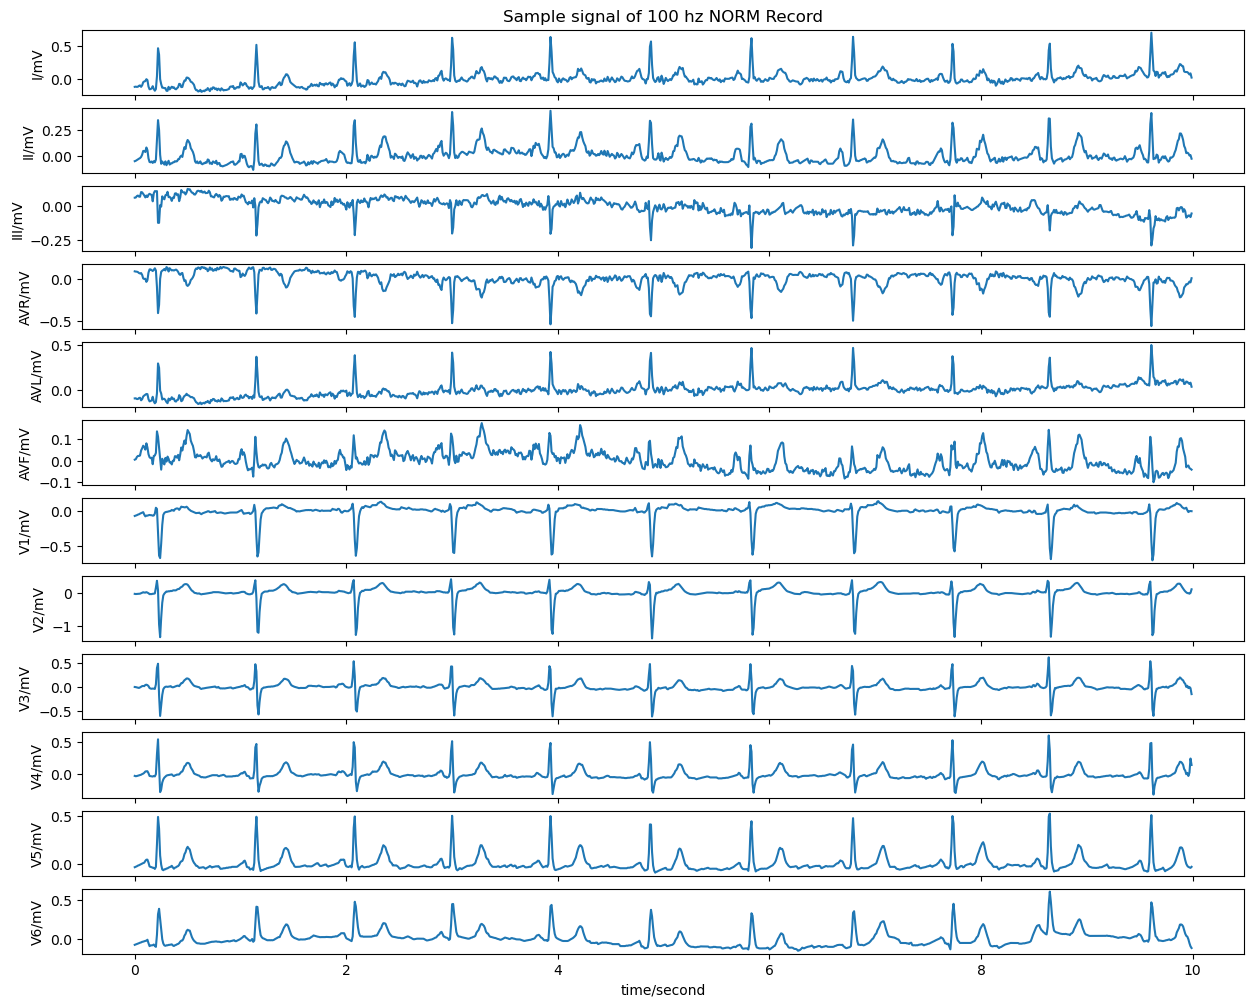

In [20]:
#plot for NORM at sampling rate of 100HZ
plot_sample_ecg(ecg_dataset, 100, data_path, "NORM")

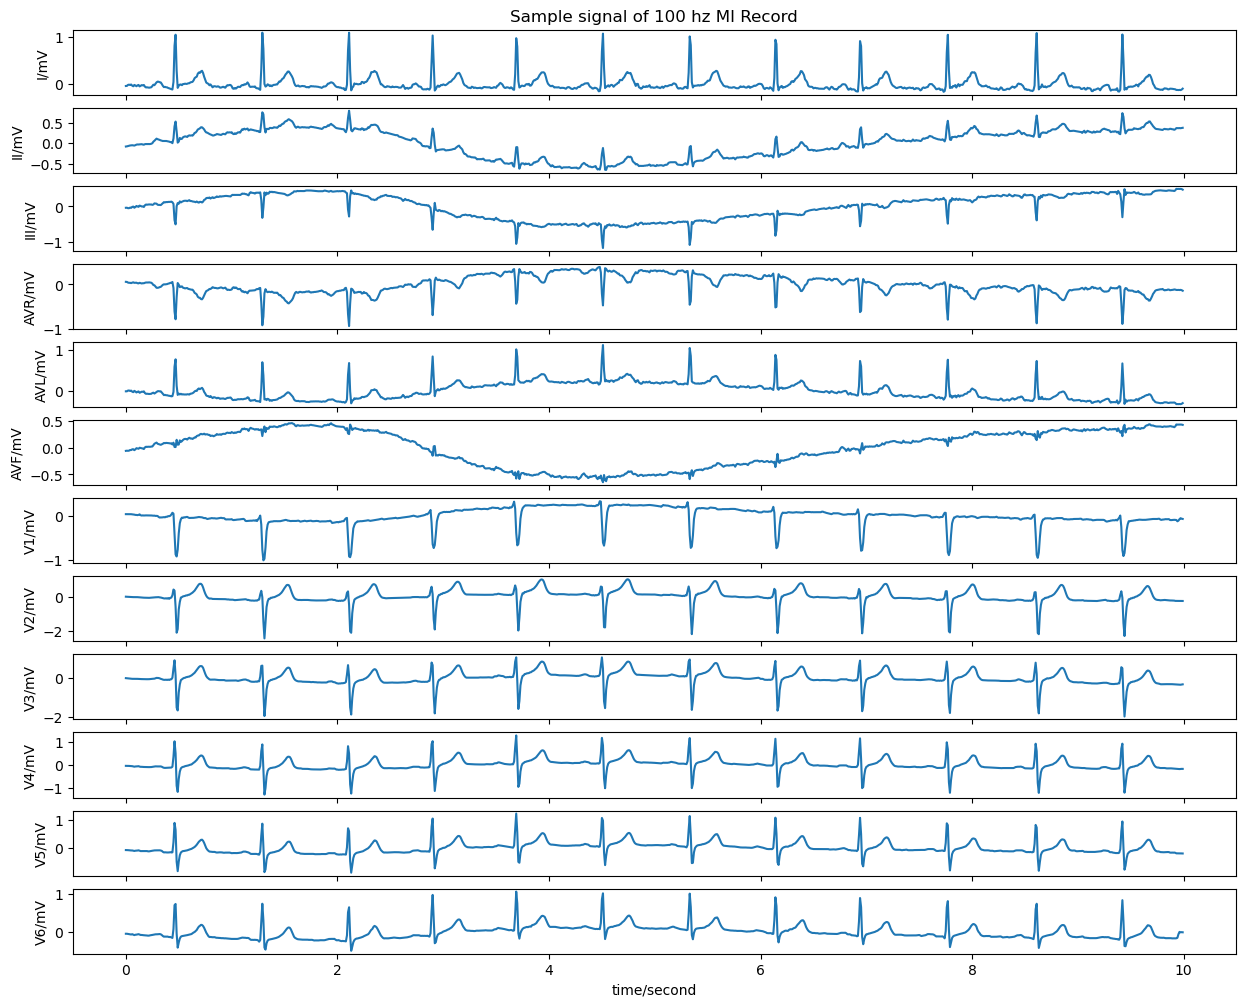

In [21]:
#plot for MI at sampling rate of 100HZ
plot_sample_ecg(ecg_dataset, 100, data_path, "MI")

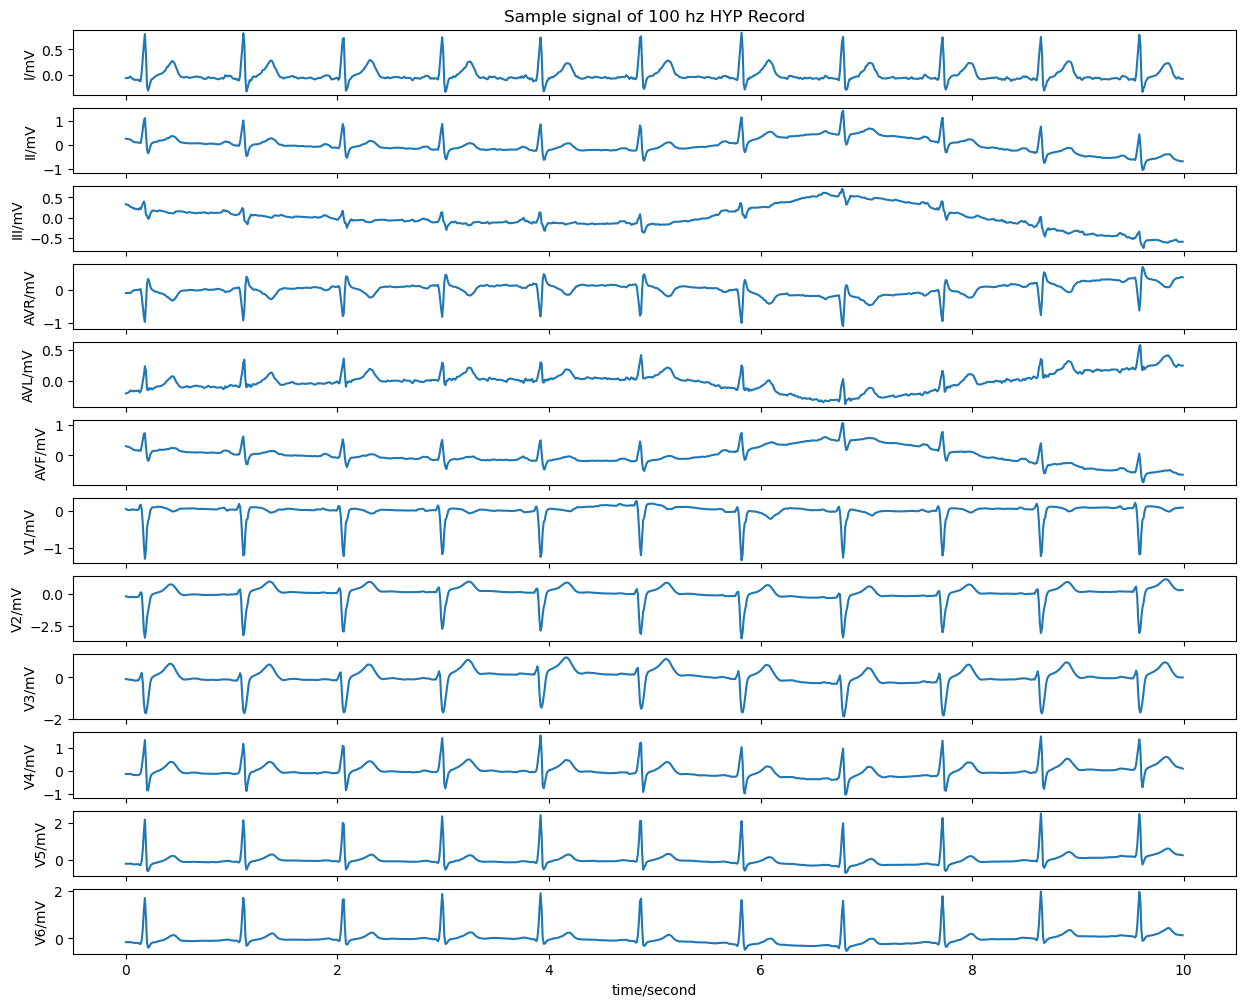

In [22]:
#plot for NORM at sampling rate of 100HZ
plot_sample_ecg(ecg_dataset, 100, data_path, "HYP")

In [23]:
!pip install fasteda

  Preparing metadata (setup.py) ... - \ done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4740 sha256=3871aa5ab00adf219504789c07e71f2909a6aa7f32ca3a1413156568120724fc
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


In [24]:
from fasteda import fast_eda

DataFrame Head:


,class,subclass,prob,strat_fold,filename_lr,filename_hr
0,NORM,NORM,100.0,3,records100/00000/00001_lr,records500/00000/00001_hr
1,NORM,NORM,80.0,2,records100/00000/00002_lr,records500/00000/00002_hr
2,NORM,NORM,100.0,5,records100/00000/00003_lr,records500/00000/00003_hr


DataFrame Tail:


,class,subclass,prob,strat_fold,filename_lr,filename_hr
21796,STTC,ISCA,50.0,2,records100/21000/21835_lr,records500/21000/21835_hr
21797,NORM,NORM,100.0,8,records100/21000/21836_lr,records500/21000/21836_hr
21798,NORM,NORM,100.0,9,records100/21000/21837_lr,records500/21000/21837_hr


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(16388, 6)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16388 entries, 0 to 21798
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        16388 non-null  object 
 1   subclass     16388 non-null  object 
 2   prob         16388 non-null  float64
 3   strat_fold   16388 non-null  int64  
 4   filename_lr  16388 non-null  object 
 5   filename_hr  16388 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 896.2+ KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
prob,16388,90.277,100,21.548,15,100,100,100,100,-2.369869,4.671193
strat_fold,16388,5.526,6,2.88,1,3,6,8,10,-0.009608,-1.228343


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



/opt/conda/lib/python3.10/site-packages/fasteda/__init__.py:124: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.3f')


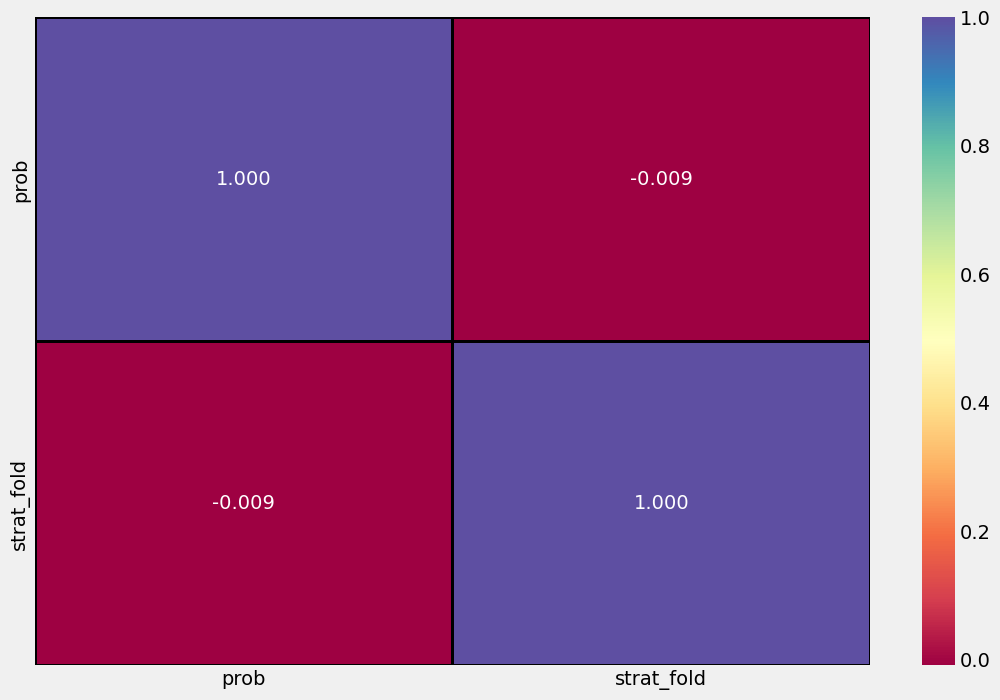

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



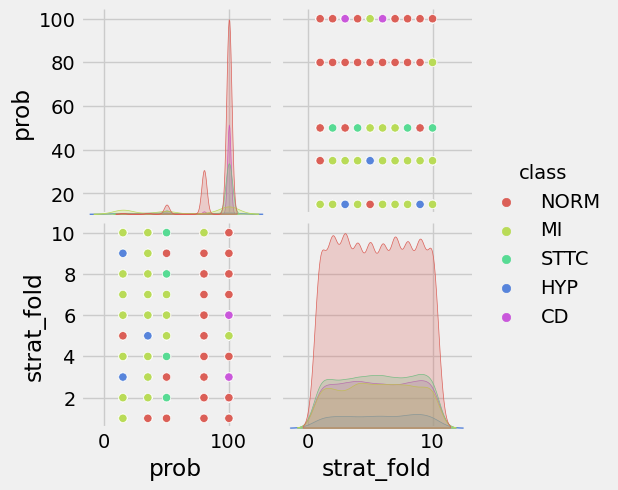

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):

----------------------------------------------------------------------------------------------------
Countplot(s):



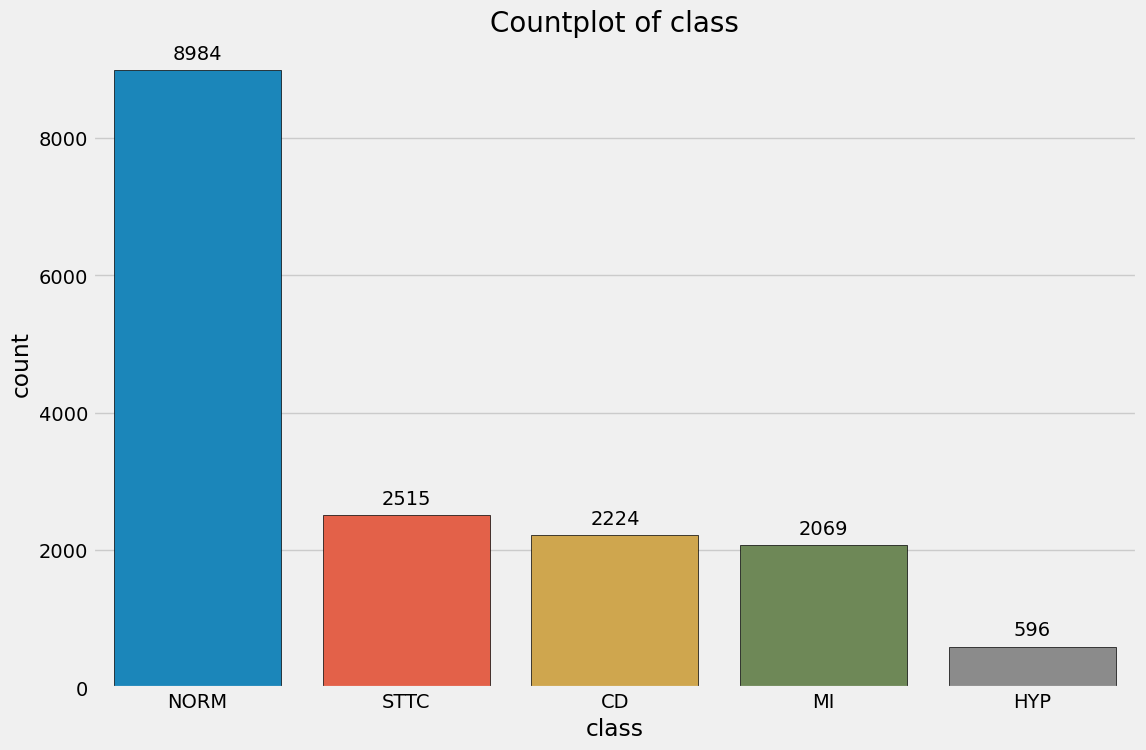

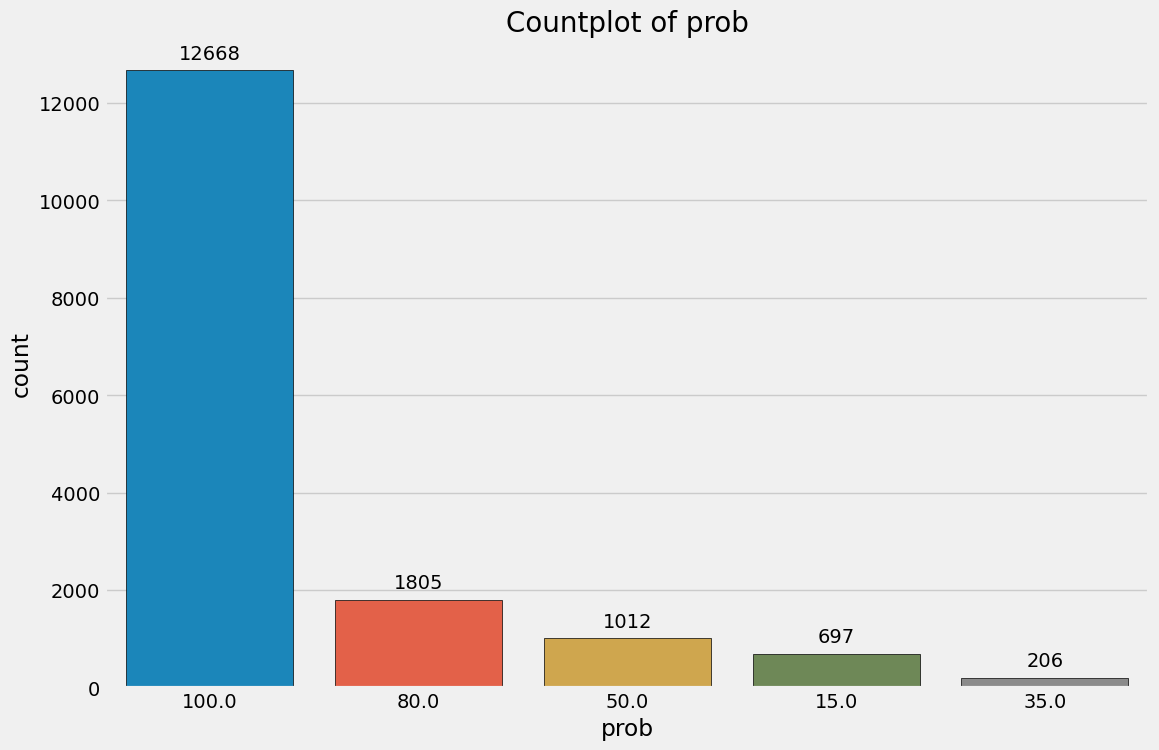

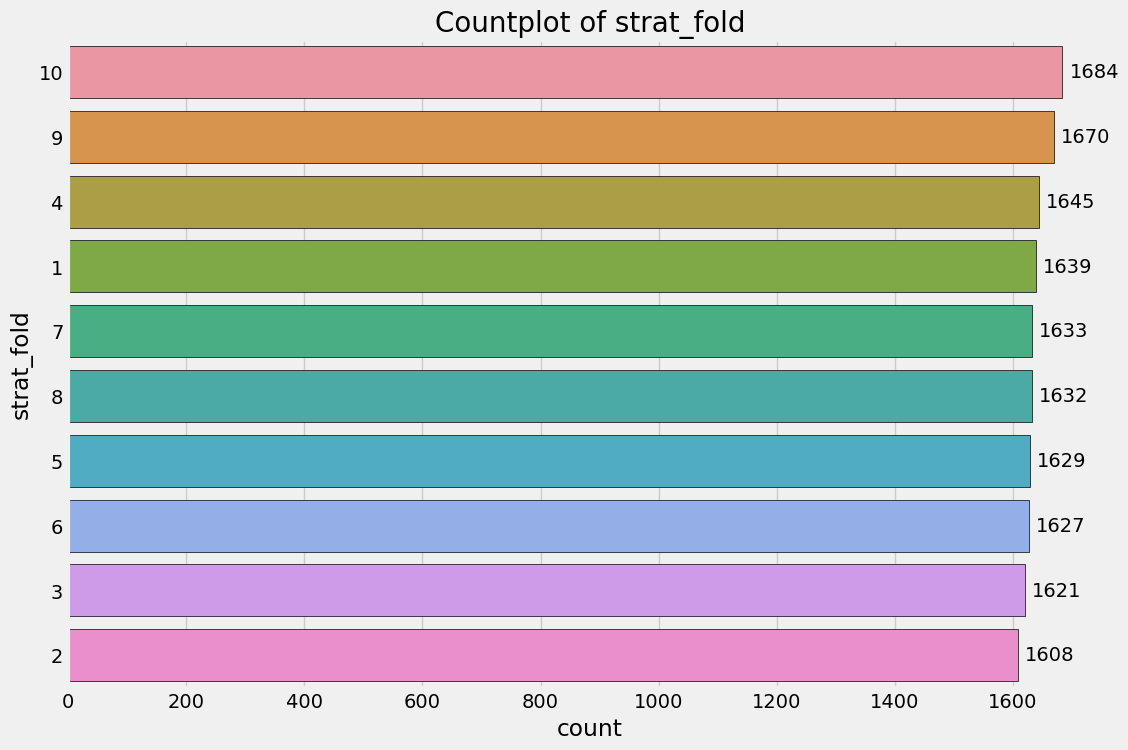

In [25]:
#use this package for the EDA
fast_eda(ecg_dataset, target = "class")

# **Preprocessing of ECG Data**

In [26]:
import scipy.signal as signal
from scipy.signal import butter, filtfilt

In [27]:
# Denoising Methods

def remove_baseline_wander(ecg_signal, sampling_rate):
    # Determine the cutoff frequency for high-pass filter
    cutoff_freq = 0.05  # Adjust this value based on your signal characteristics

    # Design and apply a high-pass filter to remove baseline wander
    b, a = signal.butter(1, cutoff_freq / (sampling_rate / 2), 'highpass')
    ecg_signal_filtered = signal.filtfilt(b, a, ecg_signal)
    
    return ecg_signal_filtered

In [28]:
def apply_notch_filter(ecg_signal, notch_freq, sampling_rate):
    # Design and apply a notch filter to remove powerline interference
    q_factor = 30  # Adjust this value based on your signal characteristics
    notch_freq_normalized = notch_freq / (sampling_rate / 2)
    b, a = signal.iirnotch(notch_freq_normalized, q_factor)
    ecg_signal_filtered = signal.filtfilt(b, a, ecg_signal)

    return ecg_signal_filtered

In [29]:
# Apply bandpass filter to remove noise
def apply_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

In [30]:
def apply_normalization(ecg_signal):
    # Apply normalization to scale the signal between 0 and 1
    ecg_signal_normalized = (ecg_signal - np.min(ecg_signal)) / (np.max(ecg_signal) - np.min(ecg_signal))
    
    return ecg_signal_normalized

In [31]:
# Define the preprocess_ecg_data function
def preprocess_ecg_data(ecg_signal, sampling_rate):
    # # Remove baseline wander
    ecg_signal = remove_baseline_wander(ecg_signal, sampling_rate)
    
    # Apply notch filter
    notch_freq = 50 
    ecg_signal = apply_notch_filter(ecg_signal,notch_freq, sampling_rate)
    #ecg_signal = np.apply_along_axis(lambda x: apply_notch_filter(x, notch_freq=notch_freq, sampling_rate=sampling_rate), axis=0, arr=ecg_signal)
    
    # Apply bandpass filter
    lowcut = 0.5  
    highcut = 40  
    ecg_signal = np.apply_along_axis(lambda x: apply_bandpass_filter(x, lowcut=lowcut, highcut=highcut, fs=sampling_rate), axis=0, arr=ecg_signal)
    
    # Apply normalization
    ecg_signal = apply_normalization(ecg_signal)
    
    return ecg_signal

In [32]:
sampling_rate = 100
#apply preprocessing to the ECG data.
X_cleaned = preprocess_ecg_data(list(ecg_data), sampling_rate)

In [33]:
print(f"Total number of ECG (X_Cleaned) Records : {X_cleaned.shape}")
print(f"Total number of Diagnostic Class(Y) Records : {len(ecg_dataset)}")

Total number of ECG (X_Cleaned) Records : (16388, 1000, 12)
Total number of Diagnostic Class(Y) Records : 16388


# Encoding the Y class

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
enc = LabelEncoder()

In [36]:
X_cleaned = X_cleaned.reshape(X_cleaned.shape[0],X_cleaned.shape[2],X_cleaned.shape[1])
Y =  enc.fit_transform(np.array(ecg_dataset['class']))

In [37]:
print(f"Shape of Cleaned ECG Signal (X_cleaned) : {X_cleaned.shape}")
print(f"Shape of Diagnostic Class (Y) : {Y.shape}")

Shape of Cleaned ECG Signal (X_cleaned) : (16388, 12, 1000)
Shape of Diagnostic Class (Y) : (16388,)


# **Train/Validation/Test Split**

In [38]:
# Split data from folds provided by ptb xl
val_fold  = [8,9]
test_fold = [10] 

train_idx = np.where(np.isin(ecg_dataset['strat_fold'], val_fold+test_fold, invert=True))
val_idx = np.where(np.isin(ecg_dataset['strat_fold'], val_fold))
test_idx = np.where(np.isin(ecg_dataset['strat_fold'], test_fold))

X_train = X_cleaned[train_idx]
X_val   = X_cleaned[val_idx]
X_test  = X_cleaned[test_idx]
Y_train = Y[train_idx]
Y_val   = Y[val_idx]
Y_test  = Y[test_idx]

In [39]:
print(f"Shape of Train Data X_Train/ECG : {X_train.shape}")
print(f"Shape of Train Data Y_Train/Class : {Y_train.shape}")
print("===================================================")
print(f"Shape of Validation Data X_Val/ECG : {X_val.shape}")
print(f"Shape of Validation Data Y_Val/Class : {Y_val.shape}")
print("===================================================")
print(f"Shape of Test Data X_Test/ECG : {X_test.shape}")
print(f"Shape of Test Data Y_Test/Class : {Y_test.shape}")

Shape of Train Data X_Train/ECG : (11402, 12, 1000)
Shape of Train Data Y_Train/Class : (11402,)
Shape of Validation Data X_Val/ECG : (3302, 12, 1000)
Shape of Validation Data Y_Val/Class : (3302,)
Shape of Test Data X_Test/ECG : (1684, 12, 1000)
Shape of Test Data Y_Test/Class : (1684,)


In [40]:
#Saving the train Data for future use
np.savez("Raw_train.npz",x=X_train, y=Y_train)
np.savez("Raw_val.npz",x=X_val, y=Y_val)
np.savez("Raw_test.npz",x=X_test, y=Y_test)

# Custom Feature Extractors

In [41]:
!pip install hrv-analysis
!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.4 MB/s eta 0:00:00


In [42]:
from hrvanalysis import get_time_domain_features, get_frequency_domain_features

In [43]:
def create_custom_features(x_cleaned):
    def get_lead_features(lead, sampling_rate=100, patient_age=30, patient_gender=1):
        # process the Lead ECG signal using neurokit.
        lead_features = []
        # clean the ECG signal
        ecg_cleaned = nk.ecg_clean(lead, sampling_rate)
       # signals, rpeaks = nk.ecg_process(lead, sampling_rate=sampling_rate)
        _, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=sampling_rate)#nk.ecg_peaks(lead, sampling_rate=100)
        r_peaks = rpeaks["ECG_R_Peaks"]

        #num_features = np.random.randint(low=5, high=30)  # Randomly determine the number of features for the lead
        #lead_features = np.random.randn(num_features)  # Generate random features for the lead
        #ead_features = 
        lead_features.extend(r_peaks)

        # analyze the rpeaks
        #epochs = nk.epochs_create(data_clean, events, sampling_rate=100, epochs_start=-1, epochs_end=6)
        #RR-intervals
        rr_intervals = np.diff(r_peaks)
        lead_features.extend(rr_intervals)
        lead_features.append(np.std(rr_intervals))
        mean_rr =np.mean(rr_intervals)
        lead_features.append(mean_rr)
        lead_features.append(np.median(rr_intervals))

        #calculate the heart rate
        heart_rate = 60 / (mean_rr / 100)
        lead_features.append(heart_rate)

        #calculate the HRV features
        # Compute time-domain HRV features
        if (len(r_peaks) >= 5):
            try:
                _, waves_cwt  = nk.ecg_delineate(ecg_cleaned, r_peaks, sampling_rate=sampling_rate, method='cwt',show_type='all')
                lead_features.extend(waves_cwt["ECG_P_Onsets"])
                lead_features.extend(waves_cwt["ECG_P_Peaks"])
                lead_features.extend(waves_cwt["ECG_P_Offsets"])
                lead_features.extend(waves_cwt["ECG_Q_Peaks"])
                lead_features.extend(waves_cwt["ECG_R_Onsets"])
                lead_features.extend(waves_cwt["ECG_R_Offsets"])
                lead_features.extend(waves_cwt["ECG_S_Peaks"])
                lead_features.extend(waves_cwt["ECG_T_Onsets"])
                lead_features.extend(waves_cwt["ECG_T_Peaks"])
                lead_features.extend(waves_cwt["ECG_T_Offsets"])
            except Exception as e:
                print(f"An error occurred while processing the ECG signal: {str(e)} {rpeaks}")
                print(f"Lead na : {len(rr_intervals)}, r-peaks na - {len(rpeaks)}")
                # printing stack trace
                traceback.print_exc()

        if(len(rr_intervals)>1):
            # get the T peaks and S peaks
            time_domain_features = get_time_domain_features(rr_intervals)
            # Compute frequency-domain HRV features
            frequency_domain_features = get_frequency_domain_features(rr_intervals)

            lead_features.append(time_domain_features['sdnn'])  # Standard deviation of RR intervals
            lead_features.append(time_domain_features['rmssd'])  # Root mean square of successive differences
            lead_features.append(time_domain_features["mean_hr"]) # mean_hr
            lead_features.append(time_domain_features["median_nni"]) # median_nni
            lead_features.append(time_domain_features["sdsd"]) # sdsd
            lead_features.append(time_domain_features["max_hr"]) # max_hr
            lead_features.append(time_domain_features["min_hr"]) # min_hr
            lead_features.append(time_domain_features["std_hr"]) # std_hr
            lead_features.append(time_domain_features["cvsd"]) # cvsd
            lead_features.append(time_domain_features["nni_50"]) # nni_50
            lead_features.append(time_domain_features["nni_20"]) # pnni_50
            lead_features.append(time_domain_features["pnni_20"]) # pnni_50
            lead_features.append(frequency_domain_features['lf'])  # Low-frequency power
            lead_features.append(frequency_domain_features['hf'])  # High-frequency power
            lead_features.append(frequency_domain_features["total_power"])

        #calculate the statistical features
        lead_features.append(np.mean(lead))
        lead_features.append(np.median(lead))
        lead_features.append(np.std(lead))
        lead_features.append(skew(lead))
        lead_features.append(kurtosis(lead))


        return lead_features

    # Vectorize the get_lead_features function
    #vectorized_get_lead_features = np.vectorize(get_lead_features, signature='(n)->(m)')
    # Sample usage
    num_recordings = len(X_cleaned_reshaped)
    num_leads = 12

    # Create an empty list to store the lead features for each recording
    lead_features_list = []

    # Iterate over each recording
    for recording_idx in range(num_recordings):
        # Create an empty list to store the lead features for the current recording
        recording_lead_features = []
        print(f"Progress: {recording_idx}/{range(num_recordings)}", end="\r")
       # Get all leads for the current recording
        leads = X_cleaned_reshaped[recording_idx]

        # Compute the lead features using vectorized operations
        recording_lead_features = [get_lead_features(lead) for lead in leads]

        # Append the lead features for the current recording to the main list
        lead_features_list.append(recording_lead_features)

    # Determine the maximum number of features among all leads
    max_num_features = max(len(features) for features in np.array(lead_features_list).flatten())

    # Create an empty feature matrix with shape (num_recordings, num_leads, max_num_features)
    feature_matrix = np.zeros((num_recordings, num_leads, max_num_features))

    # Fill the feature matrix with lead features
    for recording_idx in range(num_recordings):
        for lead_idx in range(num_leads):
            lead_features = lead_features_list[recording_idx][lead_idx]
            num_features = len(lead_features)
            feature_matrix[recording_idx, lead_idx, :num_features] = lead_features

    print(feature_matrix.shape)
    return feature_matrix

In [44]:
#usage
#feature_matrix = create_custom_features(X_cleaned)

# Apply normalizatargpartitionion
from sklearn.preprocessing import MinMaxScaler

# Normalize the array
X_Features = MinMaxScaler().fit_transform(feature_matrix.reshape(feature_matrix.shape[0], feature_matrix.shape[1]*feature_matrix.shape[2]))



from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer with strategy as constant and fill_value as 0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit the imputer on X_train
imputer.fit(X_Features)

# Transform X_train to replace NaN values with 0
X_Features = imputer.transform(X_Features)

print(f"Total number of ECG (X_Features) Records : {X_Features.shape}")
print(f"Total number of Diagnostic Class(Y) Records : {Y.shape}")

# Check for NaN values in X_train
has_nan = np.isnan(X_Features).any()

if has_nan:
    print("X_train contains NaN values.")
else:
    print("X_train does not contain any NaN values.")

#save the models

np.savez("X_Features_train.npz",x=X_train, y=Y_train)
np.savez("X_Features_val.npz",x=X_val, y=Y_val)
np.savez("X_Features_test.npz",x=X_test, y=Y_test)